# MetaboliQ AI
### ~ by Mavericks
  
#### Functionality 1  
This Jupyter Notebook contains the *Linear Regression Model* for the first functionality of MetaboliQ AI.  
Problem Statement: Projecting the number of diabetic patients in a region for the next 10 years.
  
Developed for:  
1. Individuals  
2. Professionals  
3. Ministry of Health
   
Output: Projects the number of diabetic patients over the next 10 years.

In [35]:
import time
start_time = time.time()

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
data = pd.read_csv("synthetic_diabetes_data.csv")
data.head()

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
0,1960,5000000,100000,60000,40000,30.00,0.75
1,1961,5060000,101200,60720,40480,31.15,0.73
2,1962,5120720,102414,61448,40965,32.30,0.71
3,1963,5182168,103643,62186,41457,33.45,0.69
4,1964,5244354,104887,62932,41954,34.60,0.67


In [38]:
data.tail()

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
56,2016,9751663,195033,117019,78013,94.40,-0.37
57,2017,9868683,197373,118424,78949,95.55,-0.39
58,2018,9987107,199742,119845,79896,96.70,-0.41
59,2019,10106952,202139,121283,80855,97.85,-0.43
60,2020,10228236,204564,122738,81825,99.00,-0.45


# Exploratory Data Analysis

In [39]:
data.shape

(61, 7)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                61 non-null     int64  
 1   Population                          61 non-null     int64  
 2   Number of Diabetic Patients         61 non-null     int64  
 3   Number of Male Diabetic Patients    61 non-null     int64  
 4   Number of Female Diabetic Patients  61 non-null     int64  
 5   Pollution Level (AQI)               61 non-null     float64
 6   Health Index                        61 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 3.5 KB


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,61.0,1.990000e+03,1.775293e+01,1960.00,1975.00,1990.00,2005.00,2020.00
Population,61.0,7.310075e+06,1.541263e+06,5000000.00,5979676.00,7151306.00,8552499.00,10228236.00
Number of Diabetic Patients,61.0,1.462011e+05,3.082520e+04,100000.00,119593.00,143026.00,171049.00,204564.00
Number of Male Diabetic Patients,61.0,8.772046e+04,1.849510e+04,60000.00,71756.00,85815.00,102629.00,122738.00
Number of Female Diabetic Patients,61.0,5.848010e+04,1.233004e+04,40000.00,47837.00,57210.00,68419.00,81825.00
Pollution Level (AQI),61.0,6.450000e+01,2.041587e+01,30.00,47.25,64.50,81.75,99.00
Health Index,61.0,1.500000e-01,3.550587e-01,-0.45,-0.15,0.15,0.45,0.75


In [42]:
data.isnull().sum()

Year                                  0
Population                            0
Number of Diabetic Patients           0
Number of Male Diabetic Patients      0
Number of Female Diabetic Patients    0
Pollution Level (AQI)                 0
Health Index                          0
dtype: int64

## Statistical Analysis

In [43]:
data.mean()

Year                                  1.990000e+03
Population                            7.310075e+06
Number of Diabetic Patients           1.462011e+05
Number of Male Diabetic Patients      8.772046e+04
Number of Female Diabetic Patients    5.848010e+04
Pollution Level (AQI)                 6.450000e+01
Health Index                          1.500000e-01
dtype: float64

In [44]:
data.median()

Year                                     1990.00
Population                            7151306.00
Number of Diabetic Patients            143026.00
Number of Male Diabetic Patients        85815.00
Number of Female Diabetic Patients      57210.00
Pollution Level (AQI)                      64.50
Health Index                                0.15
dtype: float64

In [45]:
data.var()

Year                                  3.151667e+02
Population                            2.375491e+12
Number of Diabetic Patients           9.501932e+08
Number of Male Diabetic Patients      3.420689e+08
Number of Female Diabetic Patients    1.520299e+08
Pollution Level (AQI)                 4.168079e+02
Health Index                          1.260667e-01
dtype: float64

In [46]:
data.std()

Year                                  1.775293e+01
Population                            1.541263e+06
Number of Diabetic Patients           3.082520e+04
Number of Male Diabetic Patients      1.849510e+04
Number of Female Diabetic Patients    1.233004e+04
Pollution Level (AQI)                 2.041587e+01
Health Index                          3.550587e-01
dtype: float64

In [47]:
data.cov().T

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
Year,3.151667e+02,2.724258e+07,5.448506e+05,3.269101e+05,2.179396e+05,3.624417e+02,-6.303333
Population,2.724258e+07,2.375491e+12,4.750974e+10,2.850581e+10,1.900383e+10,3.132897e+07,-544851.582667
Number of Diabetic Patients,5.448506e+05,4.750974e+10,9.501932e+08,5.701154e+08,3.800761e+08,6.265782e+05,-10897.012333
Number of Male Diabetic Patients,3.269101e+05,2.850581e+10,5.701154e+08,3.420689e+08,2.280454e+08,3.759466e+05,-6538.201333
Number of Female Diabetic Patients,2.179396e+05,1.900383e+10,3.800761e+08,2.280454e+08,1.520299e+08,2.506305e+05,-4358.791333
Pollution Level (AQI),3.624417e+02,3.132897e+07,6.265782e+05,3.759466e+05,2.506305e+05,4.168079e+02,-7.248833
Health Index,-6.303333e+00,-5.448516e+05,-1.089701e+04,-6.538201e+03,-4.358791e+03,-7.248833e+00,0.126067


In [48]:
data.corr().T

,Year,Population,Number of Diabetic Patients,Number of Male Diabetic Patients,Number of Female Diabetic Patients,Pollution Level (AQI),Health Index
Year,1.000000,0.995638,0.995638,0.995638,0.995638,1.000000,-1.000000
Population,0.995638,1.000000,1.000000,1.000000,1.000000,0.995638,-0.995638
Number of Diabetic Patients,0.995638,1.000000,1.000000,1.000000,1.000000,0.995638,-0.995638
Number of Male Diabetic Patients,0.995638,1.000000,1.000000,1.000000,1.000000,0.995638,-0.995638
Number of Female Diabetic Patients,0.995638,1.000000,1.000000,1.000000,1.000000,0.995638,-0.995638
Pollution Level (AQI),1.000000,0.995638,0.995638,0.995638,0.995638,1.000000,-1.000000
Health Index,-1.000000,-0.995638,-0.995638,-0.995638,-0.995638,-1.000000,1.000000


## Outlier Detection and Removal

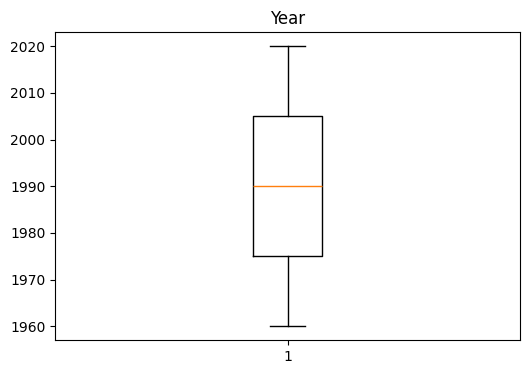

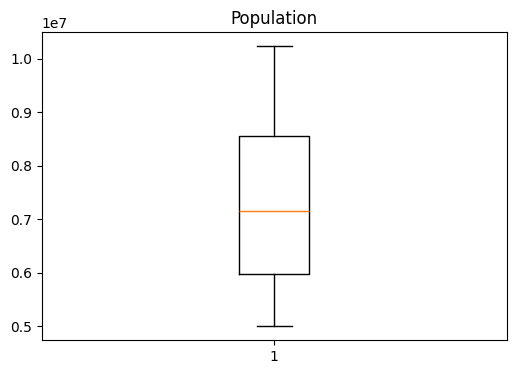

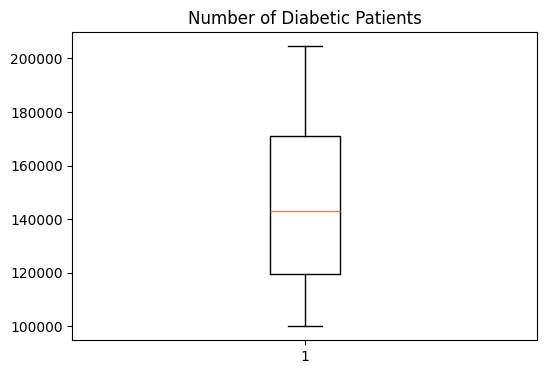

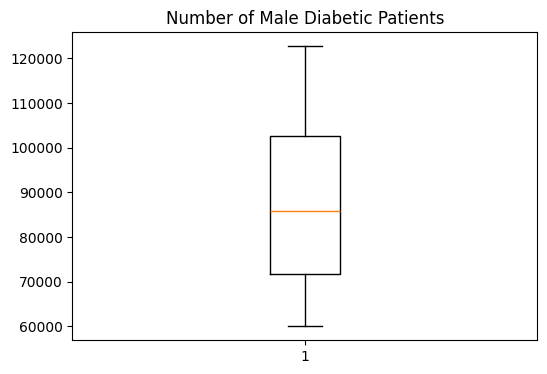

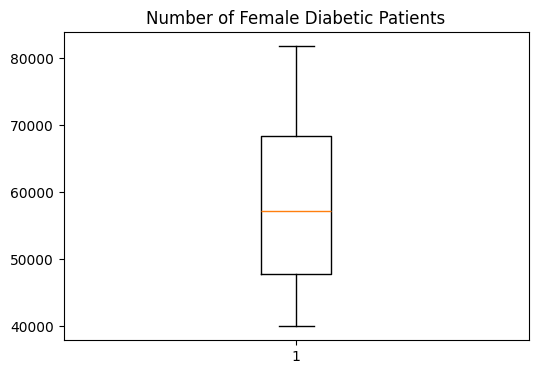

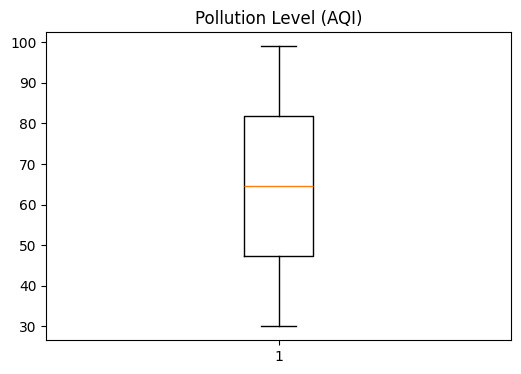

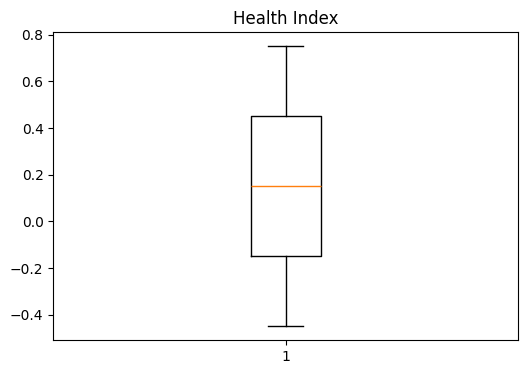

<Figure size 640x480 with 0 Axes>

In [49]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

In [50]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Calculate Quartile Deviation
quartile_deviation = (Q3 - Q1) / 2

print("Interquartile Range (IQR):", IQR)
print("Quartile Deviation:", quartile_deviation)

Interquartile Range (IQR): 121073.175
Quartile Deviation: 60536.5875


Hence, no outliers are present!

## Data Visualization

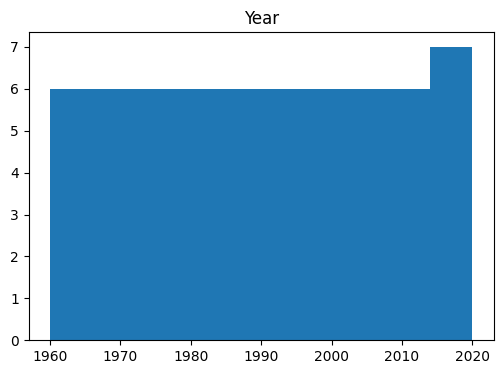

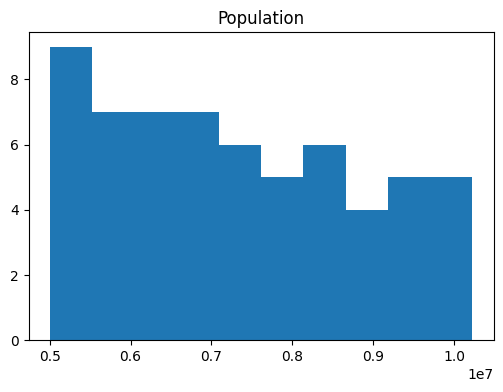

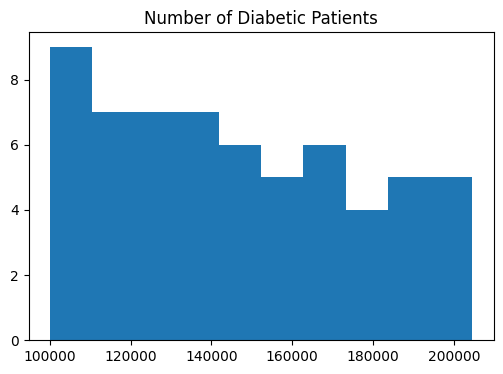

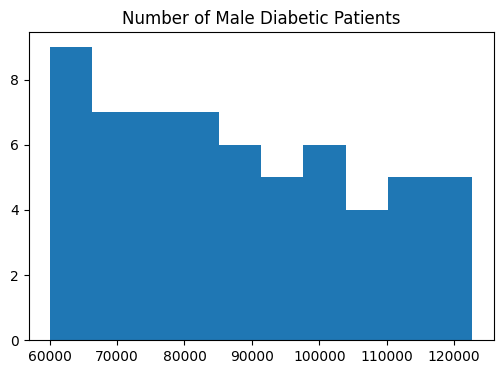

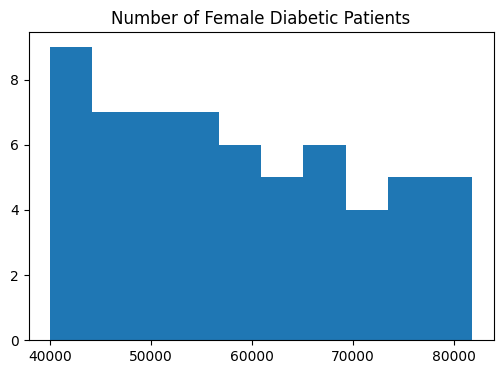

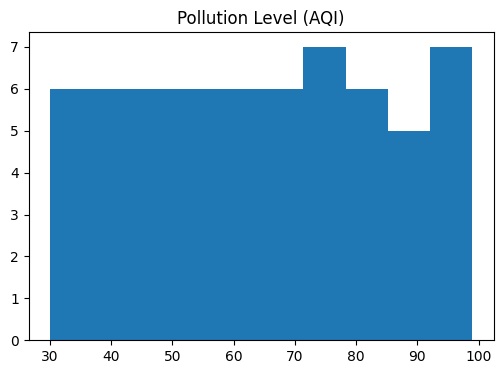

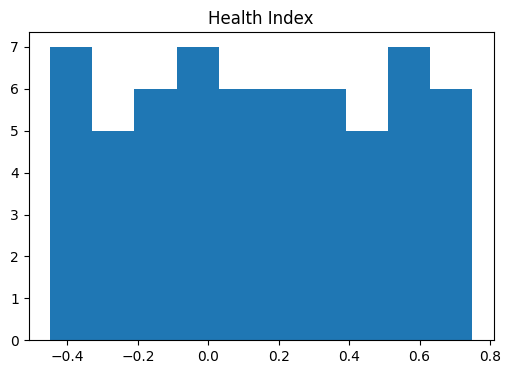

<Figure size 640x480 with 0 Axes>

In [51]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

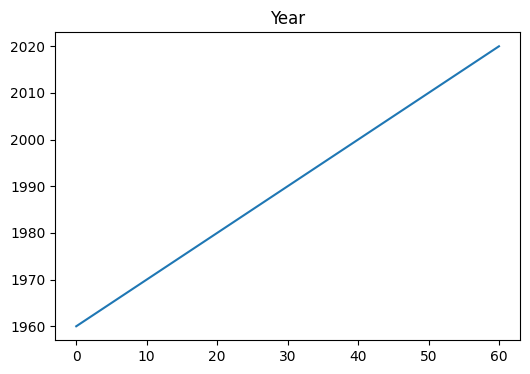

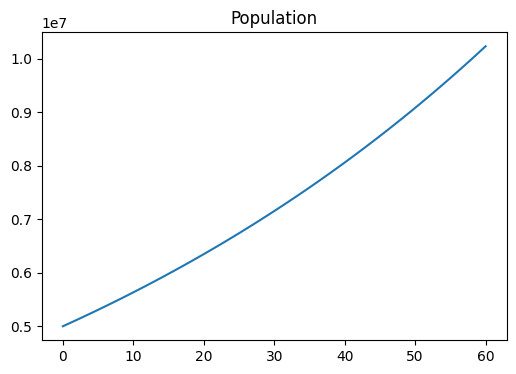

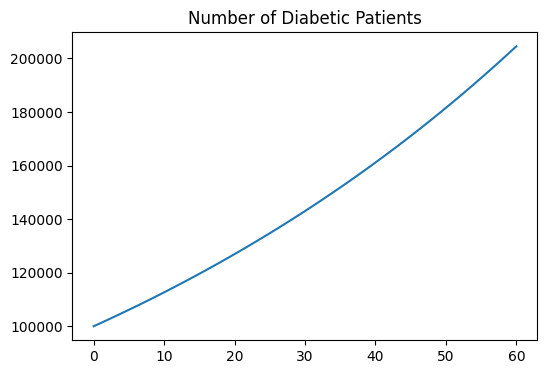

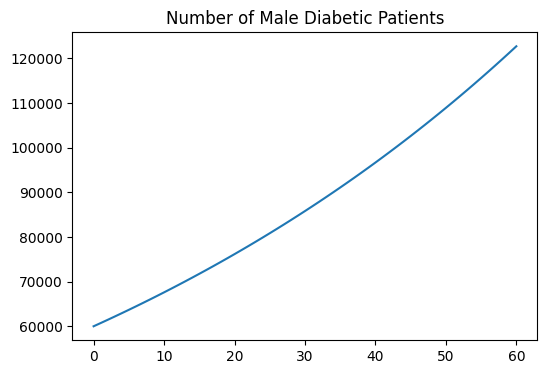

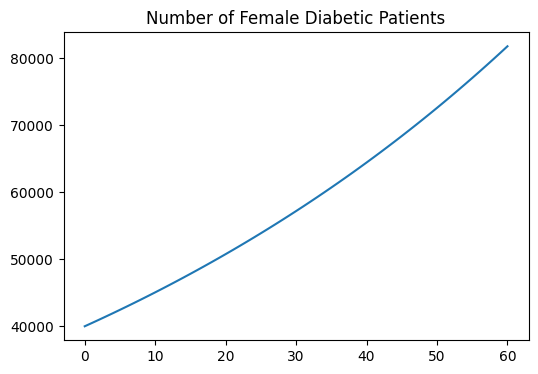

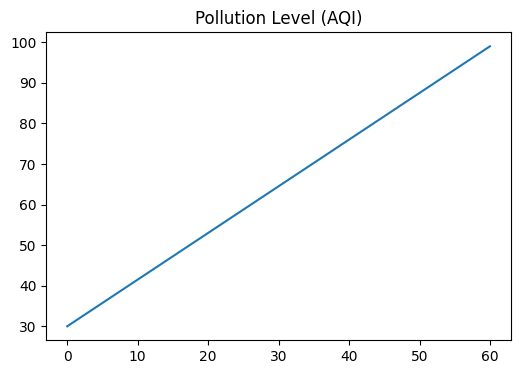

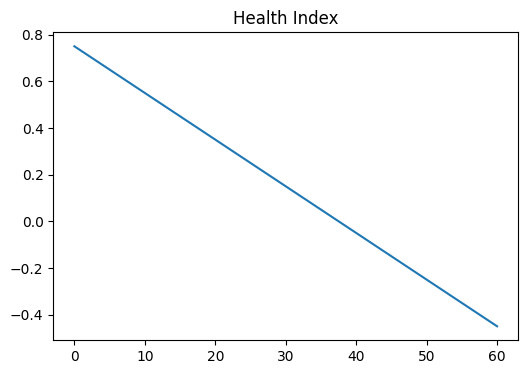

<Figure size 640x480 with 0 Axes>

In [52]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    plt.plot(data[col])
    plt.title(col)
    plt.show()
plt.tight_layout()

<Axes: >

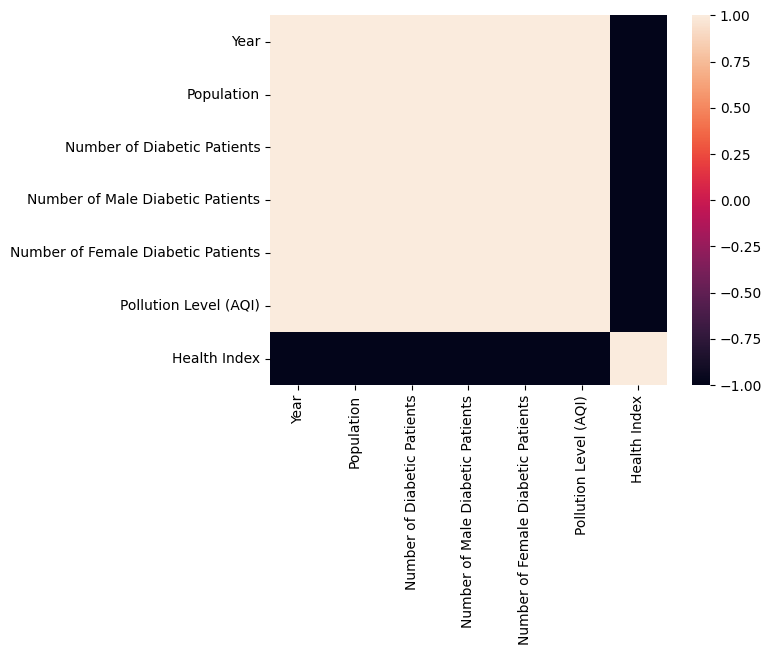

In [53]:
sns.heatmap(data.corr())

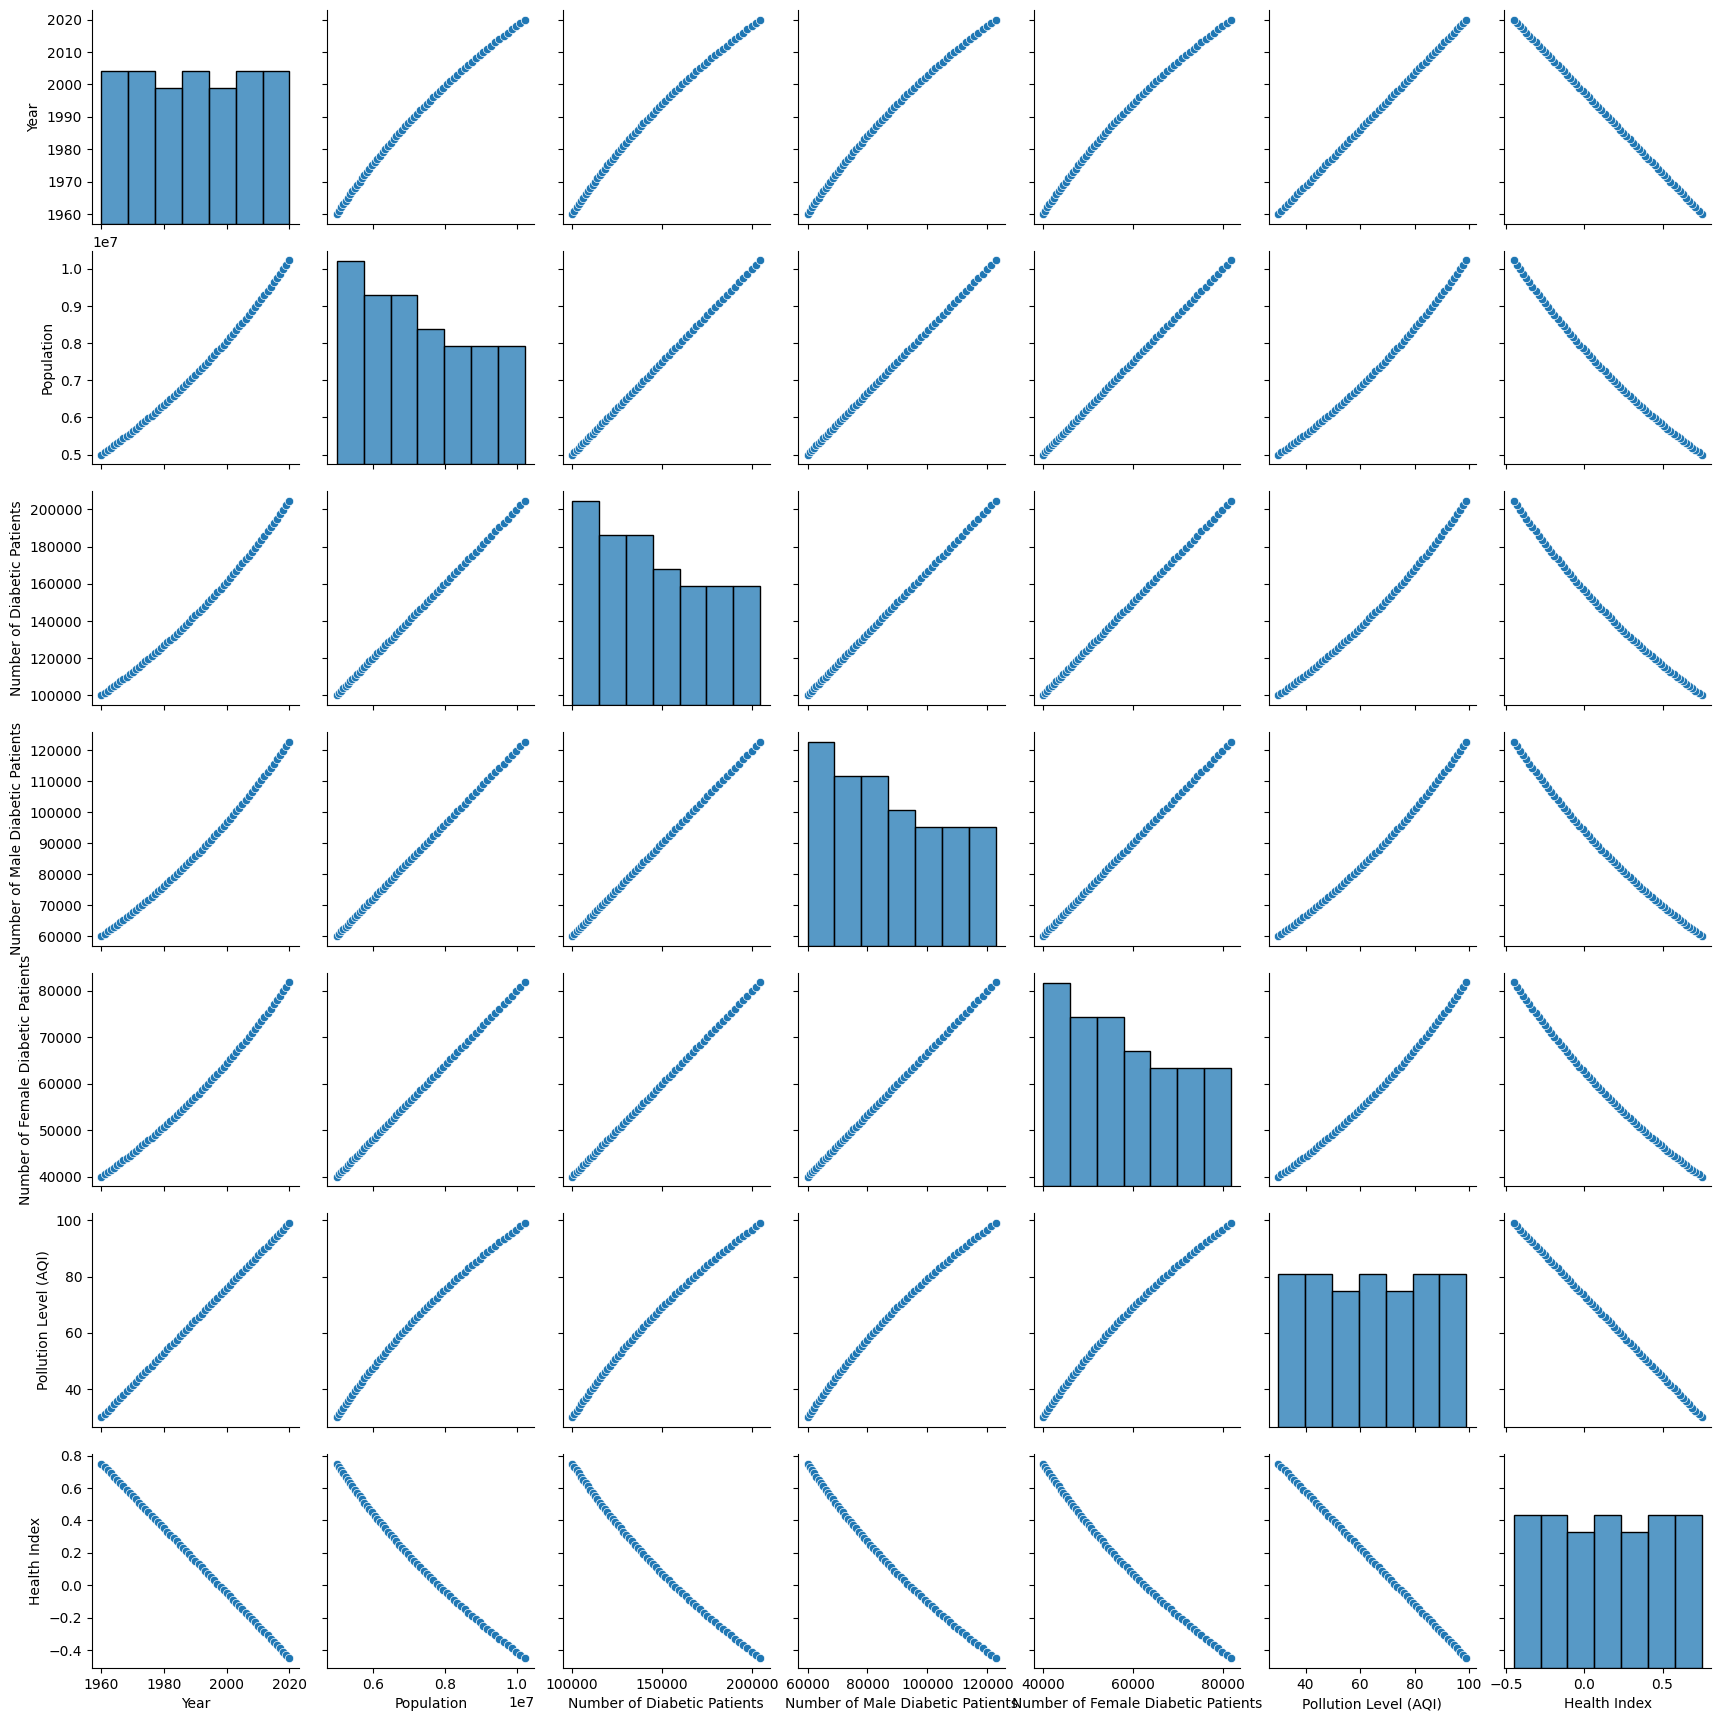

In [54]:
sns.pairplot(data)

# Model Building

In [55]:
# Creating the features (X) and target (y) variables
%time
X = data['Year'].values.reshape(-1, 1)
y = data['Number of Diabetic Patients'].values

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.58 μs


In [56]:
%time
model = LinearRegression()
model.fit(X, y)

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.1 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LinearRegression()

In [57]:
# Predict for training data
%time
y_pred = model.predict(X)
y_pred

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 6.68 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([ 94337.98783711,  96066.75764144,  97795.52744578,  99524.29725012,
       101253.06705445, 102981.83685879, 104710.60666313, 106439.37646746,
       108168.1462718 , 109896.91607614, 111625.68588048, 113354.45568481,
       115083.22548915, 116811.99529349, 118540.76509782, 120269.53490216,
       121998.3047065 , 123727.07451083, 125455.84431517, 127184.61411951,
       128913.38392384, 130642.15372818, 132370.92353252, 134099.69333686,
       135828.46314119, 137557.23294553, 139286.00274987, 141014.7725542 ,
       142743.54235854, 144472.31216288, 146201.08196721, 147929.85177155,
       149658.62157589, 151387.39138022, 153116.16118456, 154844.9309889 ,
       156573.70079323, 158302.47059757, 160031.24040191, 161760.01020624,
       163488.78001058, 165217.54981492, 166946.31961926, 168675.08942359,
       170403.85922793, 172132.62903227, 173861.3988366 , 175590.16864094,
       177318.93844528, 179047.70824961, 180776.47805395, 182505.24785829,
       184234.01766262, 1

In [58]:
# Print evaluation metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2451.534665499562
Mean Squared Error (MSE): 8136311.189318721
Root Mean Squared Error (RMSE): 2852.4219865438426
R-squared (R²): 0.9912944901249927


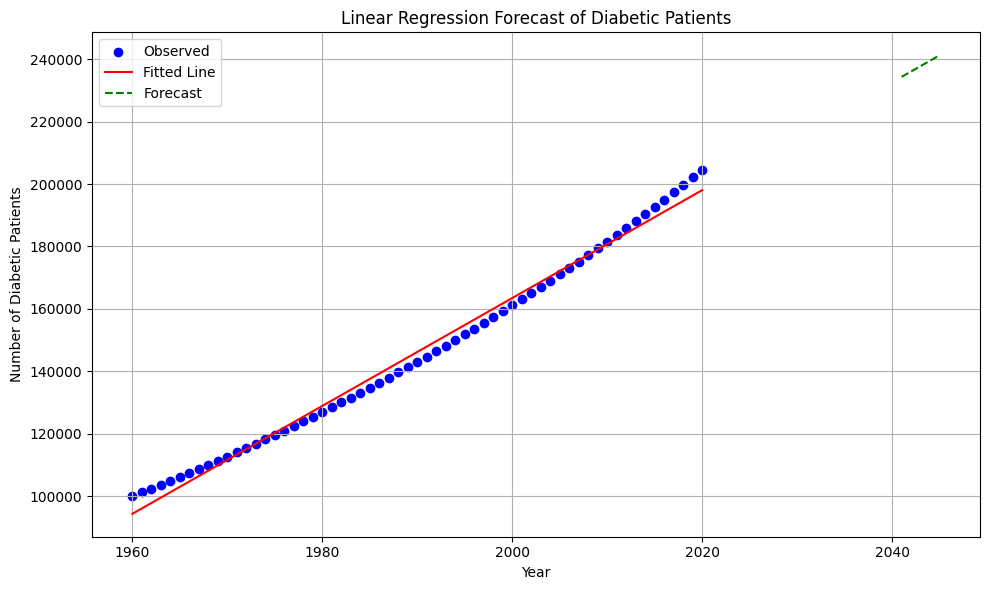

In [59]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Number of Diabetic Patients'], color='blue', label='Observed')
plt.plot(data['Year'], y_pred, color='red', label='Fitted Line')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Diabetic Patients')
plt.title('Linear Regression Forecast of Diabetic Patients')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Predict future values
%time
future_years = np.array([1966, 1967, 1968, 1969, 1970]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])
future_predictions

CPU times: user 5 μs, sys: 2 μs, total: 7 μs
Wall time: 4.29 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([104710.60666313, 106439.37646746, 108168.1462718 , 109896.91607614,
       111625.68588048])

In [61]:
# Predict future values
%time
future_years = np.array([2031, 2032, 2033, 2034, 2035]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])
future_predictions

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 4.53 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([217080.64394502, 218809.41374936, 220538.1835537 , 222266.95335804,
       223995.72316237])

In [62]:
# Predict future values
%time
future_years = np.array([2041, 2042, 2043, 2044, 2045]).reshape(-1, 1)
future_predictions = model.predict(future_years)
# Combine historical and future predictions
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
combined_data = pd.concat([data, future_data.set_index('Year')])
future_predictions

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 4.29 μs


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([234368.34198839, 236097.11179273, 237825.88159707, 239554.6514014 ,
       241283.42120574])

In [63]:
while True:
    try:
        year = int(input("Please enter the year to predict: "))
        # Predict future value
        future_years = np.array([year]).reshape(-1, 1)
        future_predictions = model.predict(future_years)

        # Combine historical and future predictions
        future_data = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Patients': future_predictions})
        combined_data = pd.concat([data, future_data.set_index('Year')])
        # Print prediction
        print(f"Predicted number of diabetic patients in {year}: {future_predictions[0]:.0f}")
        choice = input("Would you like to predict again? (Y/N): ")
        if choice.lower() == "y":
            continue
        else:
            break
    except ValueError:
        print("Please enter a valid integer year.")

Please enter the year to predict:  2029


/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/u52cf2c07a685f66a624580ce75a945c/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Predicted number of diabetic patients in 2029: 213623


Would you like to predict again? (Y/N):  N


### Serializing this trained Linear Regression Model

In [64]:
from joblib import dump
dump(model, 'Functionality_1.joblib')

['Functionality_1.joblib']

In [65]:
end_time = time.time()
print(f"Total Wall Time: {end_time - start_time:.2f} seconds")

Total Wall Time: 26.44 seconds


In [66]:
# Terminated